In [1]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
def grid_to_list(grid):
    ret = []
    for j in range(0, len(grid)):
        for i in range(0, len(grid[j])):
            print(j, i)
            if i < len(grid[j])-1:
                ret.append((grid[j][i], grid[j][i+1]))
            if j < len(grid[i])-1:
                ret.append((grid[j][i], grid[j+1][i]))
    return ret

In [3]:
level = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


/Users/eyortucboylu/.local/share/virtualenvs/q_learning-h8gInF-b/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


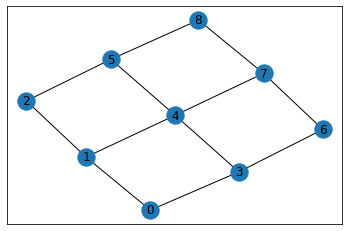

In [4]:
# map cell to cell, add circular cell to goal point
goal = 3

points_count = len(level) * len(level[0])

points_list = grid_to_list(level)


G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [5]:
# how many points in graph? x points
MATRIX_SIZE = points_count

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [6]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(0, 3)
(1, 2)
(1, 4)
(2, 5)
(3, 4)
(3, 6)
(4, 5)
(4, 7)
(5, 8)
(6, 7)
(7, 8)


matrix([[ -1.,   0.,  -1., 100.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1., 100.,   0.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1., 100.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.],
        [ -1.,  -1.,  -1., 100.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,   0.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.]])

In [7]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 0

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [8]:
# Training
scores = []
for i in range(1500):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 100.0
max_value 80.0
max_value 164.0
max_value 131.20000000000002
max_value 104.96000000000002
max_value 0.0
max_value 0.0
max_value 104.96000000000002
max_value 80.0
max_value 164.0
max_value 164.0
max_value 164.0
max_value 104.96000000000002
max_value 104.96000000000002
max_value 131.20000000000002
max_value 80.0
max_value 164.0
max_value 131.20000000000002
max_value 0.0
max_value 231.20000000000002
max_value 131.20000000000002
max_value 231.20000000000002
max_value 0.0
max_value 131.20000000000002
max_value 64.0
max_value 231.20000000000002
max_value 131.20000000000002
max_value 184.96000000000004
max_value 131.20000000000002
max_value 131.20000000000002
max_value 231.20000000000002
max_value 104.96000000000002
max_value 131.20000000000002
max_value 284.96000000000004
max_value 284.96000000000004
max_value 147.96800000000005
max_value 227.96800000000005
max_v

max_value 291.13781977088007
max_value 376.9102558167041
max_value 232.91025581670408
max_value 301.5282046533633
max_value 471.13781977088007
max_value 301.5282046533633
max_value 471.13781977088007
max_value 291.13781977088007
max_value 376.9102558167041
max_value 376.9102558167041
max_value 301.5282046533633
max_value 241.22256372269064
max_value 291.13781977088007
max_value 471.13781977088007
max_value 301.5282046533633
max_value 301.5282046533633
max_value 301.5282046533633
max_value 376.9102558167041
max_value 301.5282046533633
max_value 471.13781977088007
max_value 291.13781977088007
max_value 471.13781977088007
max_value 376.9102558167041
max_value 301.5282046533633
max_value 476.9102558167041
max_value 291.13781977088007
max_value 376.9102558167041
max_value 291.13781977088007
max_value 241.22256372269064
max_value 301.5282046533633
max_value 301.5282046533633
max_value 301.5282046533633
max_value 301.5282046533633
max_value 376.9102558167041
max_value 476.9102558167041
max_va

max_value 319.1876018492191
max_value 319.1876018492191
max_value 255.3500814793753
max_value 398.98450231152384
max_value 255.3500814793753
max_value 319.1876018492191
max_value 319.1876018492191
max_value 318.98450231152384
max_value 318.98450231152384
max_value 398.98450231152384
max_value 498.7306278894048
max_value 398.98450231152384
max_value 398.98450231152384
max_value 398.98450231152384
max_value 319.1876018492191
max_value 398.98450231152384
max_value 398.98450231152384
max_value 398.98450231152384
max_value 498.7306278894048
max_value 398.98450231152384
max_value 319.1876018492191
max_value 498.7306278894048
max_value 498.7306278894048
max_value 319.1876018492191
max_value 319.1876018492191
max_value 398.98450231152384
max_value 498.7306278894048
max_value 319.1876018492191
max_value 398.98450231152384
max_value 398.98450231152384
max_value 319.1876018492191
max_value 319.1876018492191
max_value 255.3500814793753
max_value 319.1876018492191
max_value 255.3500814793753
max_va

max_value 499.96427035147343
max_value 319.9302155302214
max_value 399.9714162811788
max_value 319.9127694127767
max_value 255.94417242417714
max_value 499.96427035147343
max_value 399.94417242417717
max_value 255.94417242417714
max_value 499.96427035147343
max_value 319.95533793934175
max_value 319.97713302494304
max_value 319.9127694127767
max_value 319.97713302494304
max_value 319.97713302494304
max_value 255.94417242417714
max_value 399.94417242417717
max_value 319.9127694127767
max_value 255.94417242417714
max_value 319.95533793934175
max_value 319.9127694127767
max_value 319.9127694127767
max_value 319.97713302494304
max_value 319.97713302494304
max_value 319.97713302494304
max_value 319.95533793934175
max_value 319.97713302494304
max_value 399.94417242417717
max_value 399.94417242417717
max_value 255.9642703514734
max_value 319.97713302494304
max_value 255.98170641995443
max_value 499.9714162811788
max_value 399.94417242417717
max_value 499.97713302494304
max_value 399.971416281

Most efficient path:
[2, 1, 0, 3]


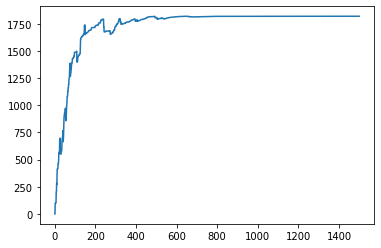

In [9]:
# Testing
current_state = 2
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()